# Spaceship Titanic

## 1.0 Introduction and Downloading dataset

In [1]:
import pandas as pd

In [2]:
import warnings
from pandas.errors import PerformanceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=PerformanceWarning)

In [3]:
df = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## 2.0 EDA

In [6]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [7]:
df.select_dtypes(include=['object']).nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [8]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Columns to exclude from showing unique values
columns_to_exclude = ['PassengerId', 'Cabin', 'Name']

for col in object_columns:
    if col not in columns_to_exclude:
        print(f"Column '{col}' unique values:")
        unique_values = df[col].unique()
        for value in unique_values:
            print(value)
        print("\n")

Column 'HomePlanet' unique values:
Europa
Earth
Mars
nan


Column 'CryoSleep' unique values:
False
True
nan


Column 'Destination' unique values:
TRAPPIST-1e
PSO J318.5-22
55 Cancri e
nan


Column 'VIP' unique values:
False
True
nan




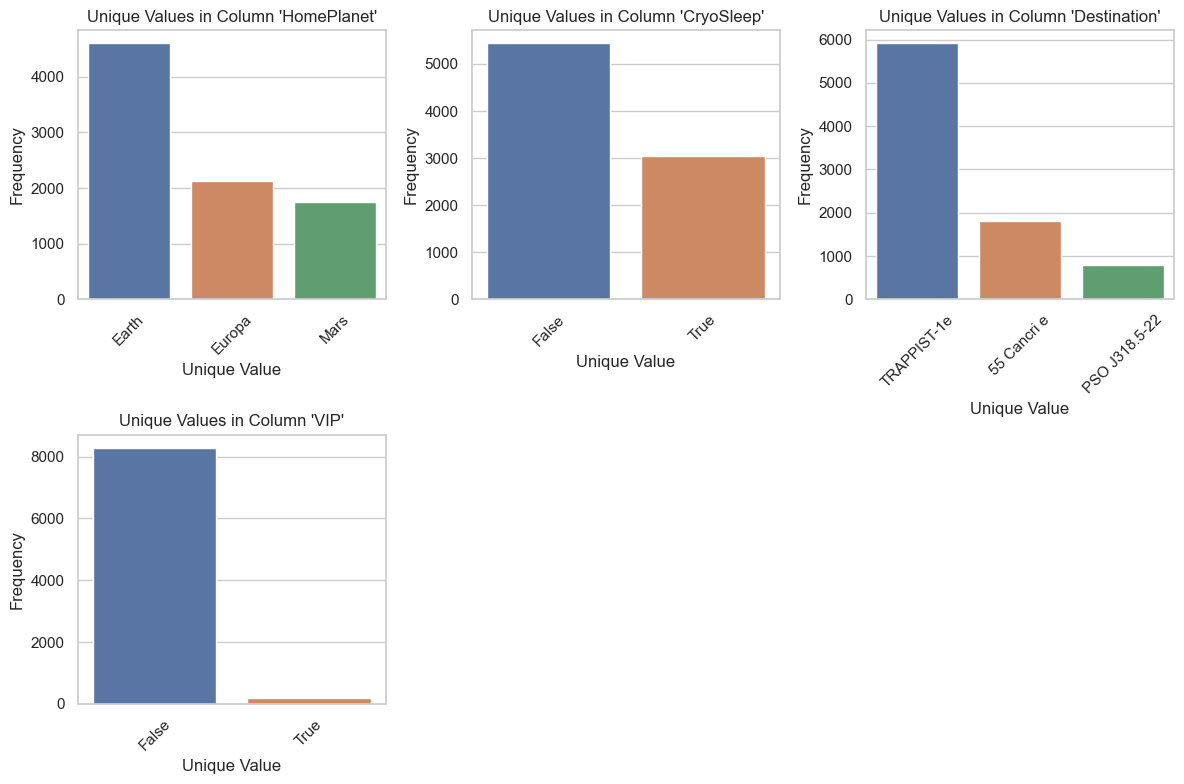

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Columns to exclude from showing unique values
columns_to_exclude = ['PassengerId', 'Cabin', 'Name']

# Create a dictionary to store unique values for relevant columns
unique_values_dict = {
    col: df[col].unique() for col in object_columns if col not in columns_to_exclude
}

# Set up the number of rows and columns for subplots
num_columns = 3
num_rows = -(-len(unique_values_dict) // num_columns)  # Ceiling division

# Set the plot style using seaborn
sns.set(style="whitegrid")

# Create subplots with smaller size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Plotting unique values for each selected column
for ax, (col, unique_values) in zip(axes.flat, unique_values_dict.items()):
    unique_counts = df[col].value_counts()
    sns.barplot(x=unique_counts.index, y=unique_counts.values, ax=ax)
    ax.set_title(f"Unique Values in Column '{col}'")
    ax.set_xlabel("Unique Value")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Hide any unused subplots
for ax in axes.flat[len(unique_values_dict):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


## 3.0 preprocessing

In [10]:
#making a separate copied dataframe
df_copy = df.copy()

In [11]:
from sklearn.impute import SimpleImputer   

In [12]:
# Creating a SimpleImputer object with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

In [13]:
import numpy as np
# Identifying columns with numeric data in the input features
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()

# Identifying columns with categorical data in the input features
categorical_cols = df_copy.select_dtypes(include='object').columns.tolist()

In [14]:
df_copy[numeric_cols].isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [15]:
df_copy[categorical_cols].isna().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
dtype: int64

### 3.1 Numerical

In [16]:
# Fitting the imputer on the numeric columns of the training inputs
imputer.fit(df_copy[numeric_cols])

SimpleImputer()

In [17]:
# Transforming the missing values in the numeric columns of the training inputs using the imputer
df_copy[numeric_cols] = imputer.transform(df_copy[numeric_cols])

In [18]:
df_copy[numeric_cols].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### 3.2 test data numerical

In [19]:
# Fitting the imputer on the numeric columns of the training inputs
imputer.fit(df_test[numeric_cols])
# Transforming the missing values in the numeric columns of the training inputs using the imputer
df_test[numeric_cols] = imputer.transform(df_test[numeric_cols])
df_test[numeric_cols].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### 3.3 Categorical

In [20]:
# Columns to remove
columns_to_remove = ['PassengerId', 'Cabin', 'Name']

# Remove the specified columns from the list
for col in columns_to_remove:
    categorical_cols.remove(col)

In [21]:
categorical_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [22]:
# Filling missing categorical values with mode (most frequent value) of each column
for column in df_copy[categorical_cols].columns:
    if df_copy[column].dtype == 'object':  # Check if column is categorical
        mode_value = df_copy[column].mode()[0]  # Calculate mode
        df_copy[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

print(df_copy[categorical_cols])

     HomePlanet  CryoSleep    Destination    VIP
0        Europa      False    TRAPPIST-1e  False
1         Earth      False    TRAPPIST-1e  False
2        Europa      False    TRAPPIST-1e   True
3        Europa      False    TRAPPIST-1e  False
4         Earth      False    TRAPPIST-1e  False
...         ...        ...            ...    ...
8688     Europa      False    55 Cancri e   True
8689      Earth       True  PSO J318.5-22  False
8690      Earth      False    TRAPPIST-1e  False
8691     Europa      False    55 Cancri e  False
8692     Europa      False    TRAPPIST-1e  False

[8693 rows x 4 columns]


In [23]:
df_copy[categorical_cols].isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
dtype: int64

#### 3.3.1 onehot encoder

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected columns
encoded_cols = encoder.fit_transform(df_copy[categorical_cols])

In [26]:
# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(categorical_cols)
feature_names

array(['HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True'],
      dtype=object)

In [27]:
# Create a DataFrame from the encoded columns with proper column names
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_copy.drop(columns=categorical_cols), encoded_df], axis=1)

In [28]:
df_encoded.head(5)

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,0.0,0.0,1.0,0.0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,0.0,0.0,0.0,1.0,1.0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Specify columns to remove
columns_to_remove = ['PassengerId', 'Cabin', 'Name']

# Drop the specified columns
df_encoded = df_encoded.drop(columns=columns_to_remove)


In [30]:
df_encoded.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0,0.0,0.0,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1.0,0.0,0.0,0.0,1.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1.0,0.0,0.0,0.0,1.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Convert True to 1 and False to 0 in the 'Transported' column
df_encoded['Transported'] = df_encoded['Transported'].astype(int)

In [32]:
df_encoded.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
dtype: int64

### 3.4 Test data Categorical

In [33]:
# Filling missing categorical values with mode (most frequent value) of each column
for column in df_test[categorical_cols].columns:
    if df_test[column].dtype == 'object':  # Check if column is categorical
        mode_value = df_test[column].mode()[0]  # Calculate mode
        df_test[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected columns
encoded_cols = encoder.fit_transform(df_test[categorical_cols])

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame from the encoded columns with proper column names
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
df_test_encoded = pd.concat([df_test.drop(columns=categorical_cols), encoded_df], axis=1)

df_test_encoded.head(5)

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0013_01,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,0.0,1.0,0.0,1.0,0.0
1,0018_01,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.0,0.0,0.0,0.0,1.0,0.0
2,0019_01,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1.0,0.0,1.0,0.0,0.0,0.0
3,0021_01,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1.0,0.0,0.0,0.0,1.0,0.0
4,0023_01,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.0,0.0,0.0,0.0,1.0,0.0


## 4.0 Train and Validation Test

In [34]:
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame
# X contains all the feature columns except the target column
X = df_encoded.drop('Transported', axis=1)

# y contains only the target column
y = df_encoded['Transported']

# Splitting the data into training and testing sets
train_inputs, val_inputs, train_targets,  val_targets = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.1 Model Trainning

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:

clf1 = RandomForestClassifier()

In [37]:

clf1.fit(train_inputs, train_targets)

RandomForestClassifier()

### 4.2 Model Prediction and Evaluation

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [39]:
# Make predictions on the test data
predictions = clf1.predict(val_inputs)

# Calculate the accuracy score
accuracy = accuracy_score(val_targets, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.772857964347326


### 4.3 Hyperparameter Tuning

In [40]:
def test_params(**params):
    model = RandomForestClassifier(n_jobs =-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

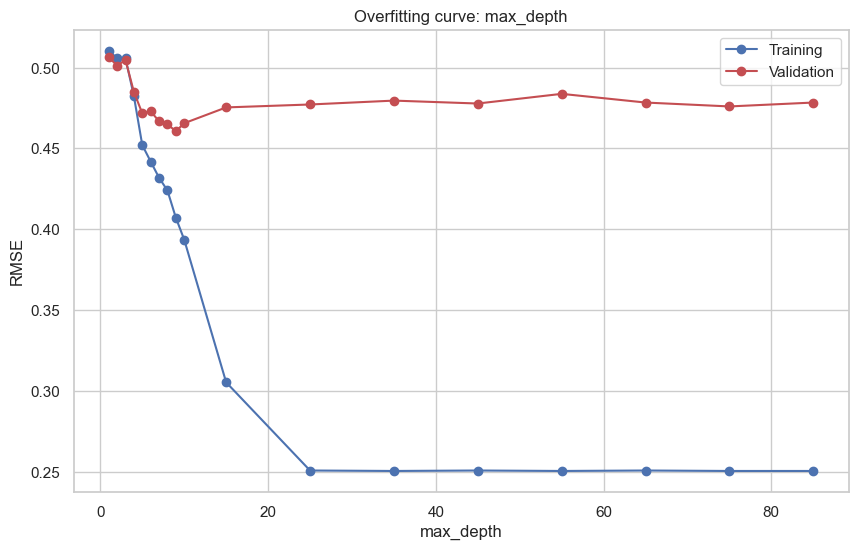

In [41]:
test_param_and_plot('max_depth', [1,2,3,4,5,6,7,8,9,10,15,25,35,45,55,65,75,85])

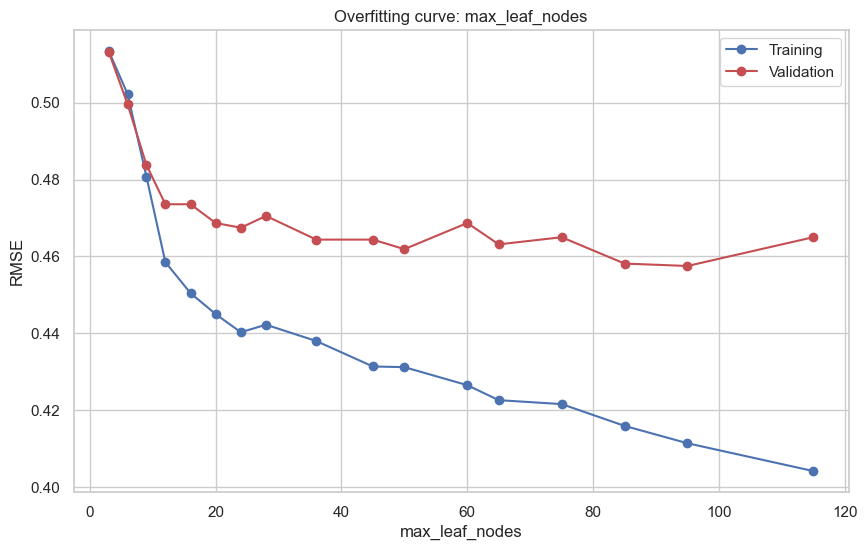

In [42]:
test_param_and_plot('max_leaf_nodes', [3,6,9,12,16,20,24,28,36,45,50,60,65,75,85,95,115])

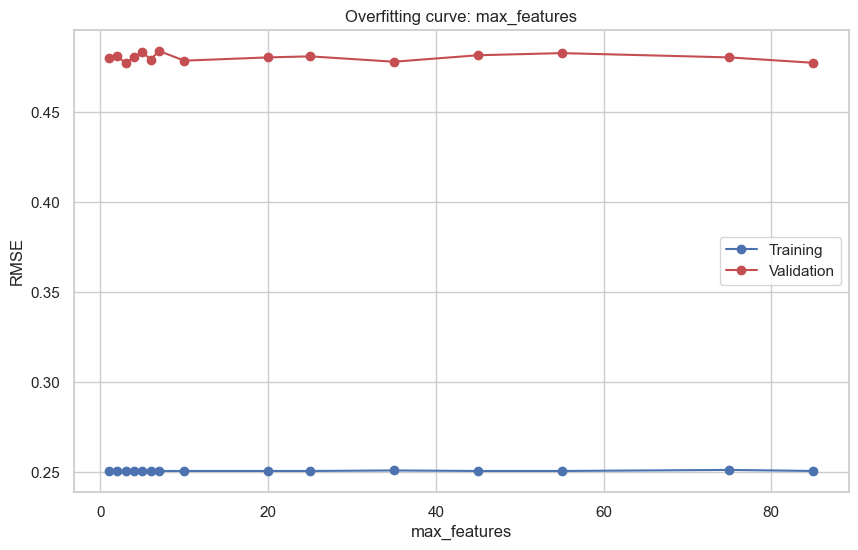

In [43]:
test_param_and_plot('max_features', [1,2,3,4,5,6,7,10,20,25,35,45,55,75,85])

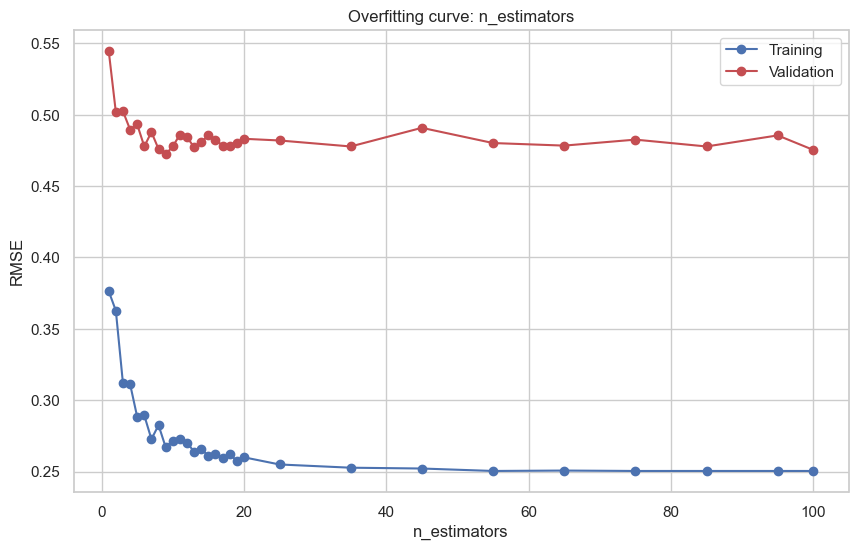

In [44]:
test_param_and_plot('n_estimators', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,35,45,55,65,75,85,95,100])

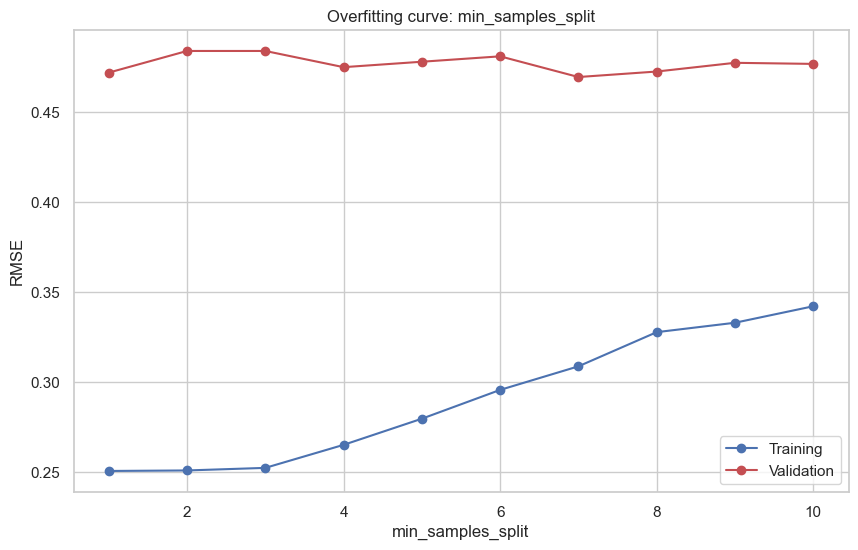

In [45]:
test_param_and_plot('min_samples_split', [1,2,3,4,5,6,7,8,9,10])

## 5.0 Final Model Trainning and Prediction 

In [46]:
# Create a new DataFrame with only the "passenger_id" column
passenger_id = df_test_encoded[['PassengerId']].squeeze()

In [47]:
# Specify columns to remove
columns_to_remove = ['PassengerId', 'Cabin', 'Name']

# Drop the specified columns
df_test_encoded = df_test_encoded.drop(columns=columns_to_remove)


In [48]:
# Assuming df_encoded is your DataFrame
# X contains all the feature columns except the target column
X = df_encoded.drop('Transported', axis=1)

# y contains only the target column
y = df_encoded['Transported']

### 5.1 Trainning the Final Model

In [49]:
clf2 = RandomForestClassifier(max_depth=70,max_leaf_nodes=100,max_features=10,n_estimators=85,random_state=42)

In [50]:

clf2.fit(X, y)

RandomForestClassifier(max_depth=70, max_features=10, max_leaf_nodes=100,
                       n_estimators=85, random_state=42)

### 5.2 Making Prediction

In [51]:
# Make predictions on the test set
test_pred = clf2.predict(df_test_encoded)

In [52]:
test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [53]:
test_pred.shape

(4277,)

### 5.3 Making a Submission CSV File 

In [54]:
test_pred = test_pred.astype(bool)

In [55]:
# Create a DataFrame with 'PassengerId' and 'y_pred'
submission_df = pd.DataFrame({'PassengerId': passenger_id, 'Transported': test_pred})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)